<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/waves/fourierAnalysisOfWaveImaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fourier Analysis of Wave Imaging
## David Brady
## University of Arizona
## August 2022

This notebook shows examples of the coherent transfer function and high pass filtering.


## libraries

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 22})
from google.colab import files
from scipy.special import jn, jn_zeros


## Impulse response and transfer function

We mode the inpulse response of coherent focal imaging system as
\begin{equation}
   h(x'',y'',x_r,y_r)=|M|e^{2\pi i{(d_i+d_o)\over \lambda}}
e^{i\pi {{{x''}^2+{y''}^2}\over
    {\lambda d_i}}}
e^{i\pi {{{x_o}^2+{y_o}^2}\over
    {\lambda d_o}}}h_r(x''-x_r,y''-y_r)
 \end{equation}
where 
\begin{equation}
 h_r(x,y)= {1\over \lambda^2 d_i^2}\int\int
P(x',y')e^{-i{2\pi\over \lambda d_i} \left (x'x +y'y\right
  )}dx'dy'
\end{equation}
and $P(x,y)$ is the pupil function. For a circular apeture,
$$P(x,y)= {\rm
  circ}(\sqrt{x^2+y^2}/A)$$
   and 
 \begin{equation}
   h_r(x,y)=\frac{\pi}{2} {A^2\over \lambda^2 d_i^2}{\rm jinc}\left ({A\over
      \lambda d_i}\sqrt{x^2+y^2}\right )
 \end{equation}
 where ${\rm jinc}(x)=2 \frac{J_1(\pi x)}{\pi x}$

In [ ]:
def jinc(x):
  # impulse response
  ji=2*jn(1,np.pi*(x+10**(-8)))/(np.pi*(x+10**(-8)))
  return ji
def pupil(x):
  p=1-np.heaviside(np.abs(x)-.5,0)
  return p


## plots of impulse response and bandpass

Text(0.5, 0, '$\\lambda$ f/#')

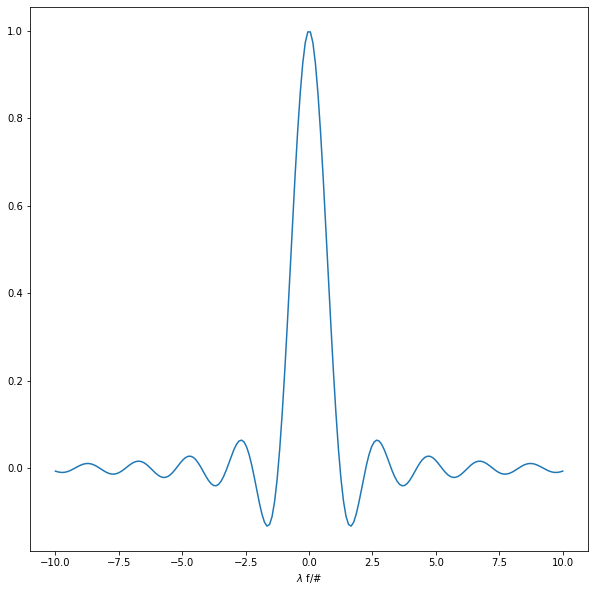

In [ ]:
# plot of jink in units of lambda* fnumber
plt.rcParams['figure.figsize'] = [10, 10]
x=np.linspace(-10,10,200)
plt.plot(x,jinc(x))
plt.xlabel(r'$\lambda$ f/#')

(-1.0, 1.0, -1.0, 1.0)

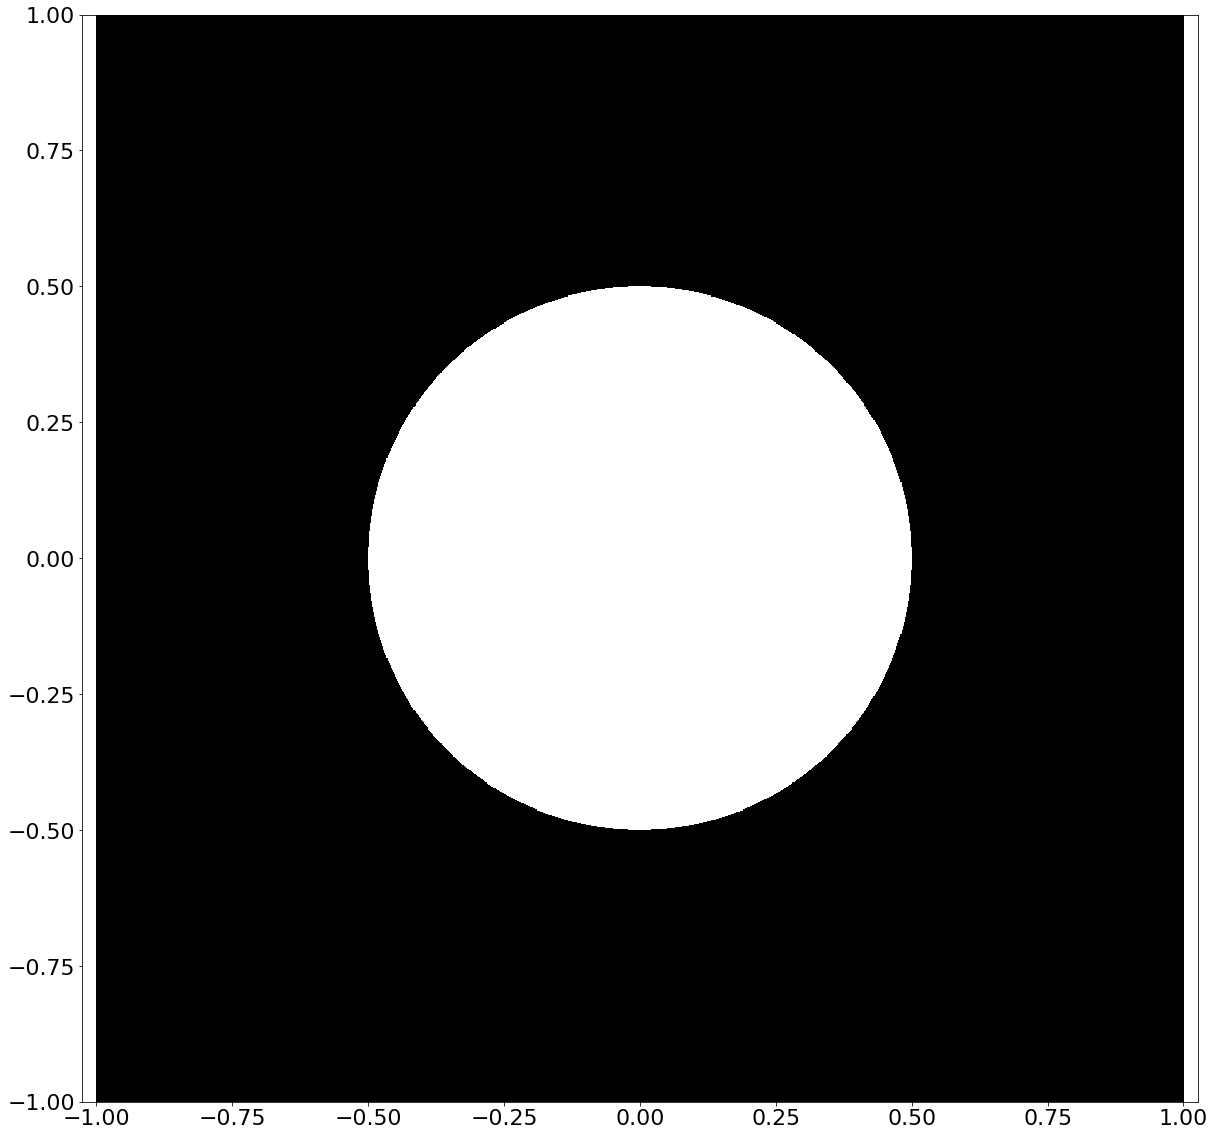

In [ ]:
# plot of the bandpass vs 1/lambda f/#
side = np.linspace(-1, 1, 1048)
X, Y = np.meshgrid(side, side)
Z = pupil(np.sqrt(X**2+Y**2))
plt.pcolormesh(X, Y, Z, shading='auto',cmap='gray')
plt.rcParams['figure.figsize'] = [30, 30]
plt.axis('equal')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

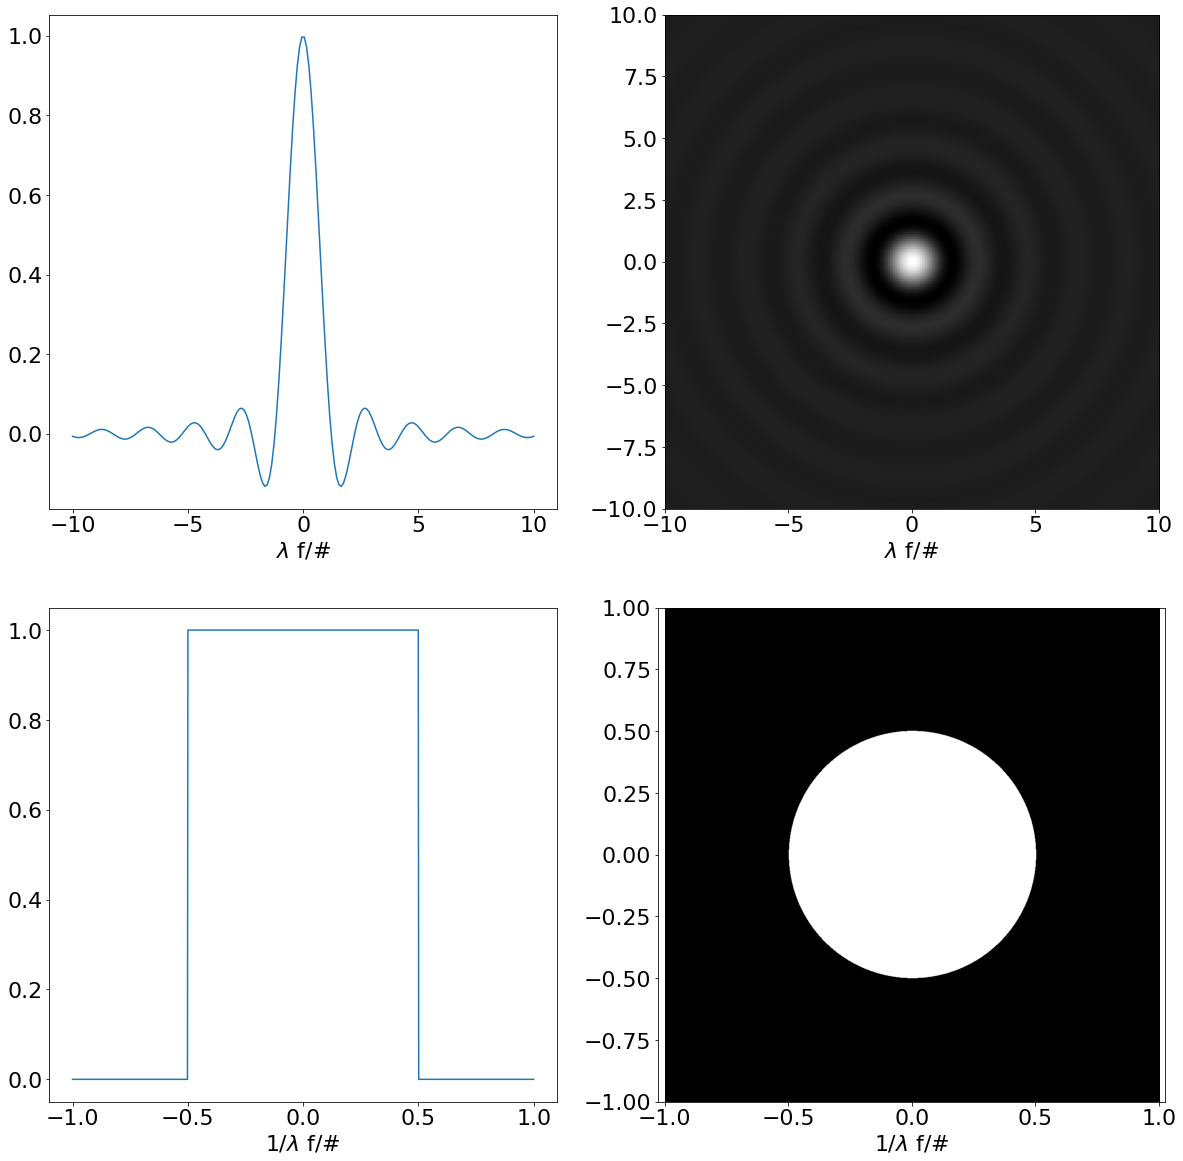

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots(2,2)
x=np.linspace(-10,10,200)
u=np.linspace(-2,2,200)
ax[0,0].plot(x,jinc(x))
ax[0,0].set_xlabel(r'$\lambda$ f/#')
X, Y=np.meshgrid(x,x)
ax[0,1].imshow(jinc(np.sqrt(X**2+Y**2)),cmap='gray', extent=[-10,10,-10,10])
ax[0,1].set_xlabel(r'$\lambda$ f/#')
# plot of the bandpass vs 1/lambda f/#
side = np.linspace(-1, 1, 1048)
ax[1,0].plot(side,pupil(side))
ax[1,0].set_xlabel(r'1/$\lambda$ f/#')
X, Y = np.meshgrid(side, side)
Z = pupil(np.sqrt(X**2+Y**2))
ax[1,1].imshow(Z, cmap='gray', extent=[-1,1,-1,1])
ax[1,1].axis('equal')
ax[1,1].set_xlabel(r'1/$\lambda$ f/#')
plt.savefig('impulseAndPassband.pdf')
files.download('impulseAndPassband.pdf')

## passband of an annlar aperture

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

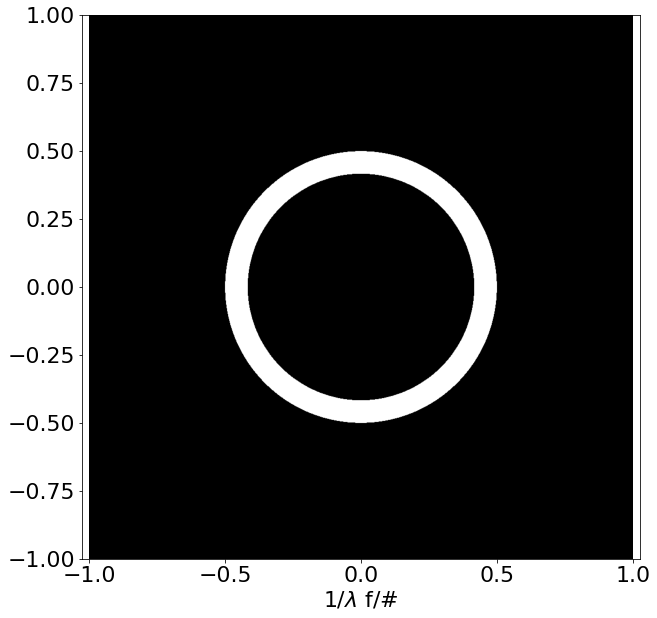

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
u = np.linspace(-1, 1, 1048)
U, V=np.meshgrid(u,u)
Z = pupil(np.sqrt(U**2+V**2))-pupil(1.2*np.sqrt(U**2+V**2))
plt.imshow(Z,cmap='gray', extent=[-1,1,-1,1])
plt.axis('equal')
plt.xlabel(r'1/$\lambda$ f/#')
plt.savefig('annularAperture.pdf')
files.download('annularAperture.pdf')

## Image transformations

here we assume that the object ranges from -64 $\lambda$ f/# to 64 $\lambda$ f/# and the sampling period is $\frac{\lambda f/\#}{4}$. Writing the signal as
$$f(x)=\cos (2\pi \alpha x^2)$$
we set we set $\alpha= \frac{1}{128(\lambda f/\#)^2}$, which means that at the edge of the field, the spatial frequency is approximately $\frac{0.5}{\lambda f/\#}$

In [ ]:
Z.shape

(512, 512)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

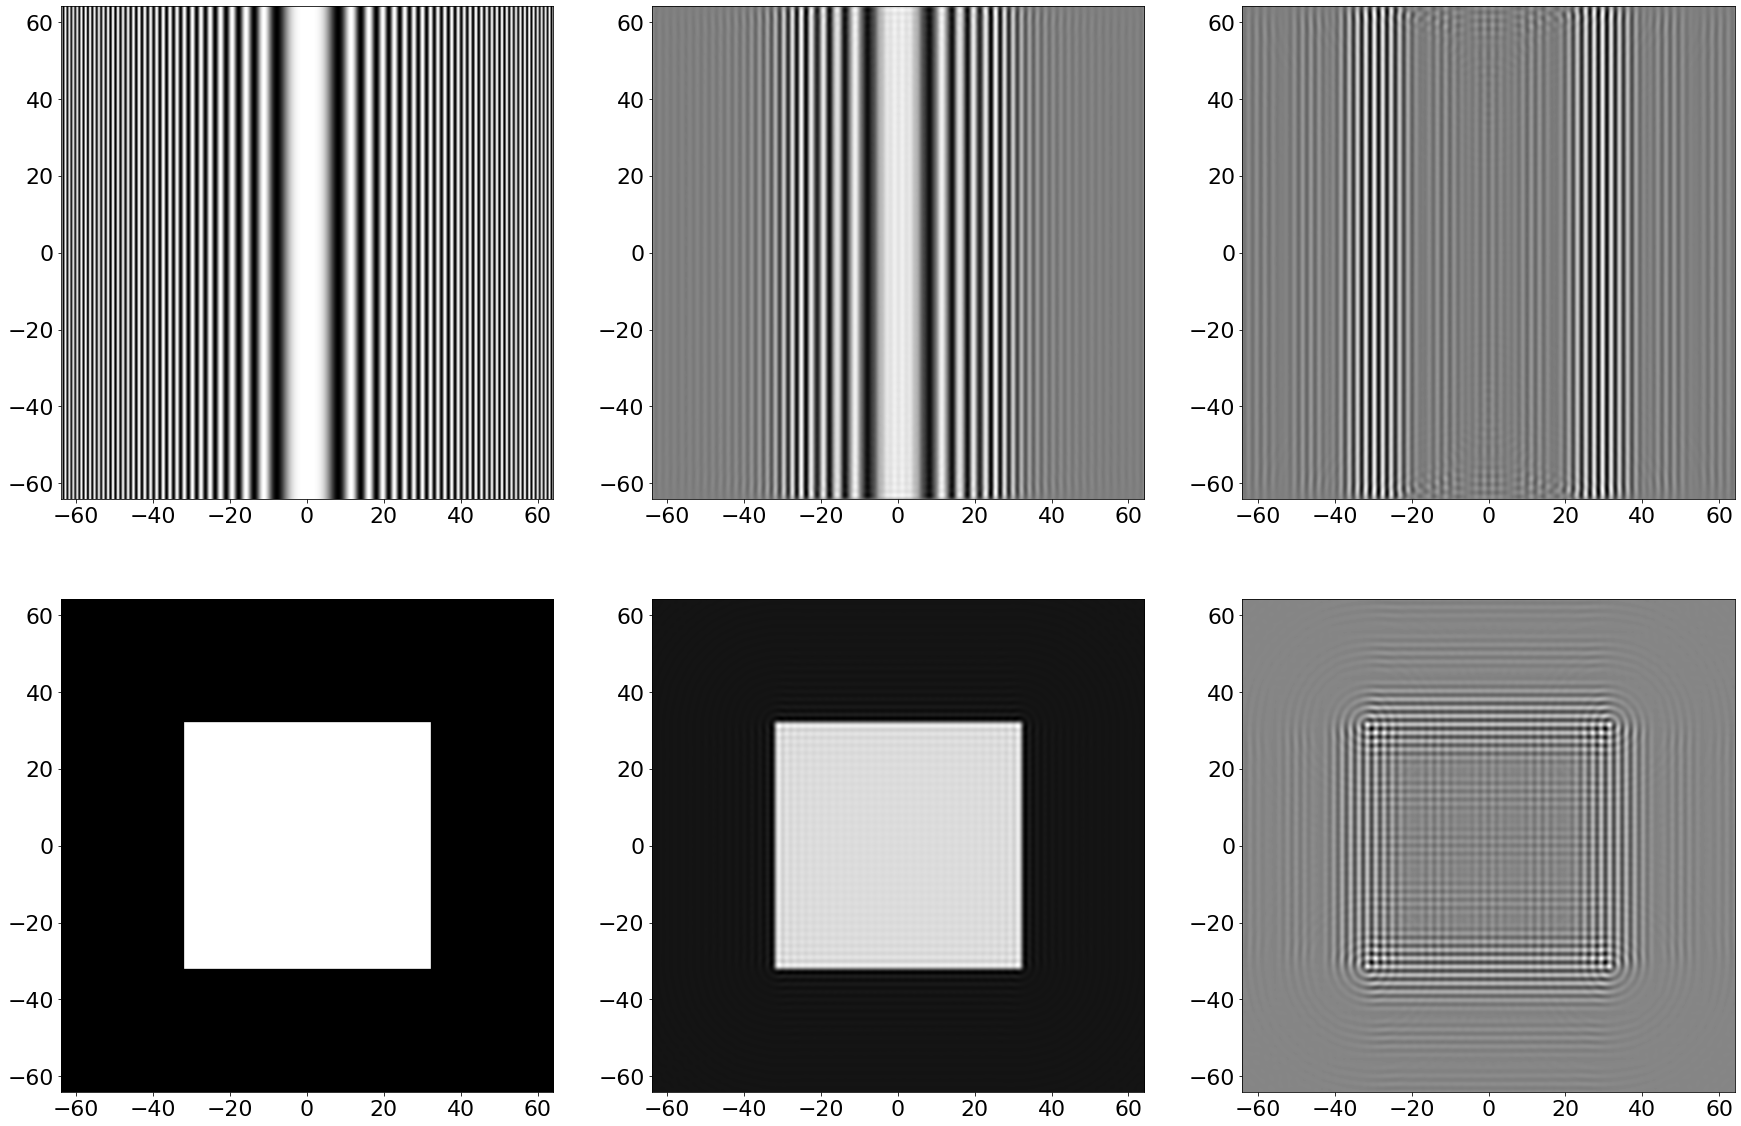

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
X=64
N=512
dx=2*X/(N-1)
B=1/(2*dx)
side = np.linspace(-X, X, N)
X, Y = np.meshgrid(side, side)
u = np.linspace(-B, B, 2*N)
U, V= np.meshgrid(u,u)
# true image
alpha=1./128.
Z = np.cos(2*np.pi*alpha*X**2)
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2,3)
ax1.imshow(Z, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# low pass filtered by cicular pupil
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.real(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]
ax2.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# High pass filtered by annular pupil
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*(pupil(np.sqrt(U**2+V**2))-pupil(1.2*np.sqrt(U**2+V**2)))
zzFiltered=np.real(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]
ax3.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# different object
# true image
Z=np.zeros((N,N))
Z[np.int16(N/4):np.int16(3*N/4),np.int16(N/4):np.int16(3*N/4)]=1
ax4.imshow(Z, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# low pass filtered by cicular pupil
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.real(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]
ax5.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# High pass filtered by annular pupil
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*(pupil(np.sqrt(U**2+V**2))-pupil(1.2*np.sqrt(U**2+V**2)))
zzFiltered=np.real(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]
ax6.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
plt.savefig('coherentFiltering.pdf')
files.download('coherentFiltering.pdf')

## Phase curvature

The object field is modulated by 
$$e^{i\pi \frac{x^2+y^2}{\lambda d_o}}$$
This term causes shift variance in the impulse response. We model this term in units of $\lambda f/\#$, noting that 
$$e^{i\pi \frac{x^2+y^2}{\lambda d_o}}=e^{i\pi \frac{x^2+y^2}{(\lambda f/\#)^2 |M|A}}$$

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

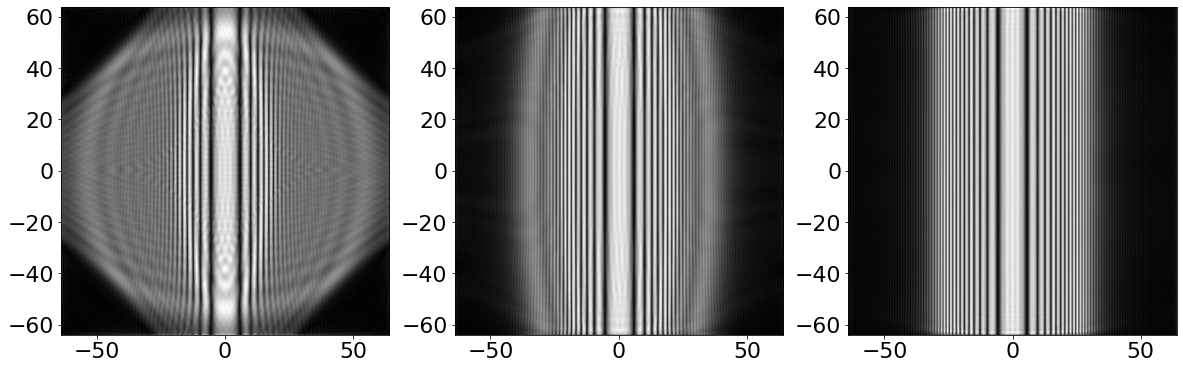

In [ ]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3)
plt.rcParams['figure.figsize'] = [20, 10]
u = np.linspace(-2, 2, 1024)
U, V= np.meshgrid(u,u)
side = np.linspace(-64, 64, 512)
X, Y = np.meshgrid(side, side)
alpha=1./128.
Z = np.cos(2*np.pi*alpha*X**2)
mA=128
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z*np.exp(1j*np.pi*(X**2+Y**2)/mA)
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax1.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# greater magnification
mA=256
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z*np.exp(1j*np.pi*(X**2+Y**2)/mA)
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax2.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# greater magnification
mA=1024
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z*np.exp(1j*np.pi*(X**2+Y**2)/mA)
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax3.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
plt.savefig('phaseCurvature.pdf')
files.download('phaseCurvature.pdf')


## Phase curvature with a unipolar binary object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

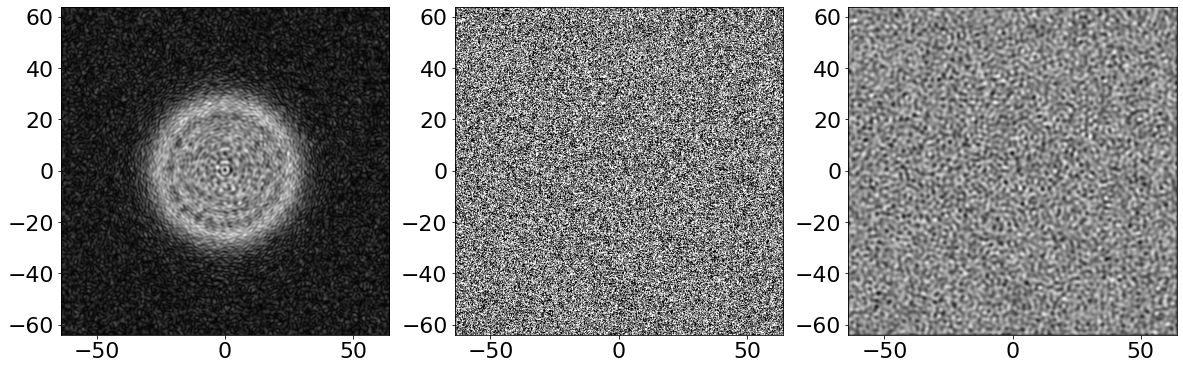

In [ ]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3)
plt.rcParams['figure.figsize'] = [20, 10]
u = np.linspace(-2, 2, 1024)
U, V= np.meshgrid(u,u)
side = np.linspace(-64, 64, 512)
X, Y = np.meshgrid(side, side)
alpha=1./128.
Z = np.random.randint(0,2,size=(512,512))
mA=64
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z*np.exp(1j*np.pi*(X**2+Y**2)/mA)
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax1.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# true image
mA=256
ax2.imshow(Z, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# greater magnification
mA=1024
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z*np.exp(1j*np.pi*(X**2+Y**2)/mA)
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax3.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
plt.savefig('unipolarphaseCurvature.pdf')
files.download('unipolarphaseCurvature.pdf')


## Phase curvature with a diffuse object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

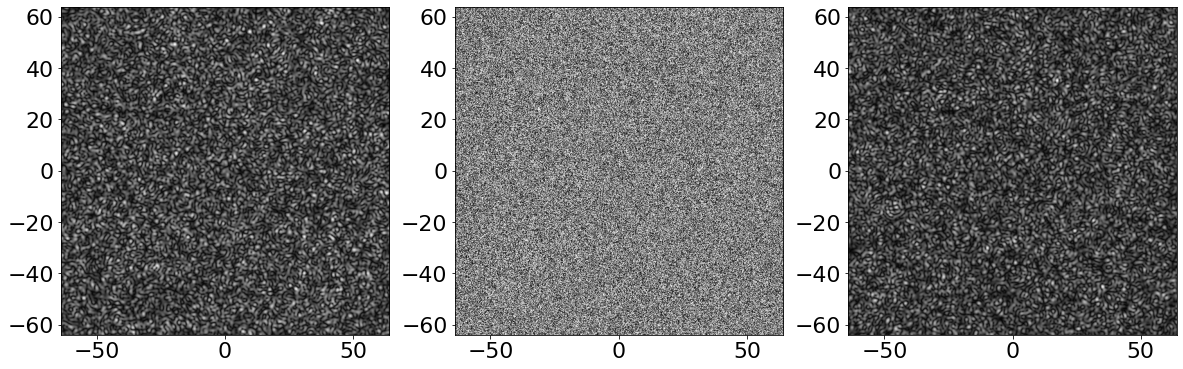

In [ ]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3)
plt.rcParams['figure.figsize'] = [20, 10]
u = np.linspace(-2, 2, 1024)
U, V= np.meshgrid(u,u)
side = np.linspace(-64, 64, 512)
X, Y = np.meshgrid(side, side)
alpha=1./128.
Z = np.exp(2*1j*np.pi*np.random.random(size=(512,512)))
mA=64
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z*np.exp(1j*np.pi*(X**2+Y**2)/mA)
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax1.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# true image
mA=256
ax2.imshow(np.angle(Z), cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# greater magnification
mA=1024
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z*np.exp(1j*np.pi*(X**2+Y**2)/mA)
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax3.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
plt.savefig('diffusephaseCurvature.pdf')
files.download('diffusephaseCurvature.pdf')


## Phase curvature with a diffuse ring

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

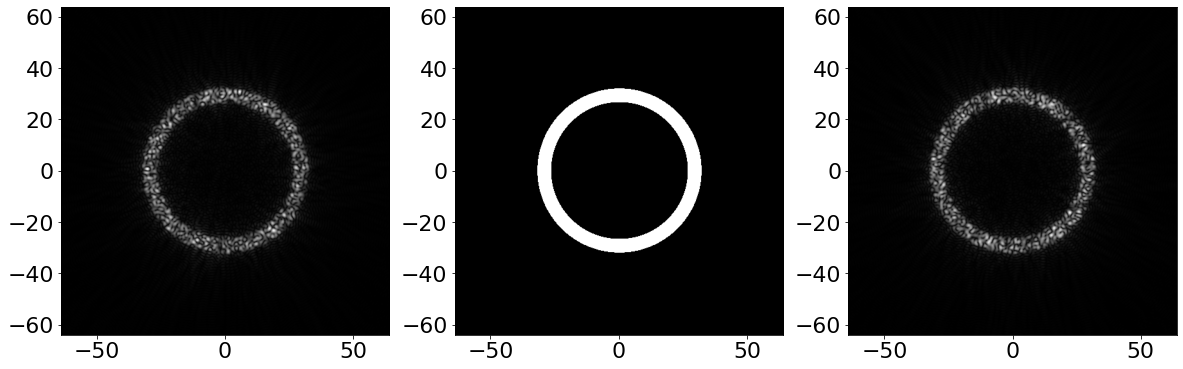

In [ ]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3)
plt.rcParams['figure.figsize'] = [20, 10]
u = np.linspace(-2, 2, 1024)
U, V= np.meshgrid(u,u)
side = np.linspace(-64, 64, 512)
X, Y = np.meshgrid(side, side)
alpha=1./128.
Z = np.exp(2*1j*np.pi*np.random.random(size=(512,512)))
Z=Z*(pupil(np.sqrt(X**2+Y**2)/64)-pupil(1.2*np.sqrt(X**2+Y**2)/64))
mA=64
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z*np.exp(1j*np.pi*(X**2+Y**2)/mA)
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax1.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# true image
mA=256
ax2.imshow(np.abs(Z), cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# greater magnification
mA=1024
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z*np.exp(1j*np.pi*(X**2+Y**2)/mA)
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax3.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
plt.savefig('ringphaseCurvature.pdf')
files.download('ringphaseCurvature.pdf')


## Phase curvature with shifting observation point

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

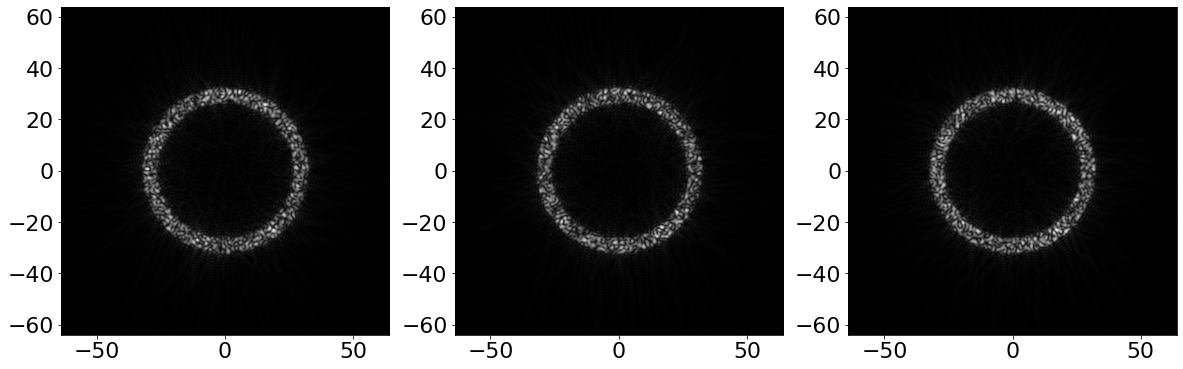

In [ ]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3)
plt.rcParams['figure.figsize'] = [20, 10]
# zero shift
mA=64
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z*np.exp(1j*np.pi*(X**2+Y**2)/mA)
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax1.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# shifted view point
zz[256:768,256:768]=Z*np.exp(1j*np.pi*((X-32)**2+Y**2)/mA)
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax2.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
# shifted viewpoint
zz[256:768,256:768]=Z*np.exp(1j*np.pi*((X+32)**2+Y**2)/mA)
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax3.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
plt.savefig('shiftedphaseCurvature.pdf')
files.download('shiftedphaseCurvature.pdf')


## Fourier transform of random fields

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

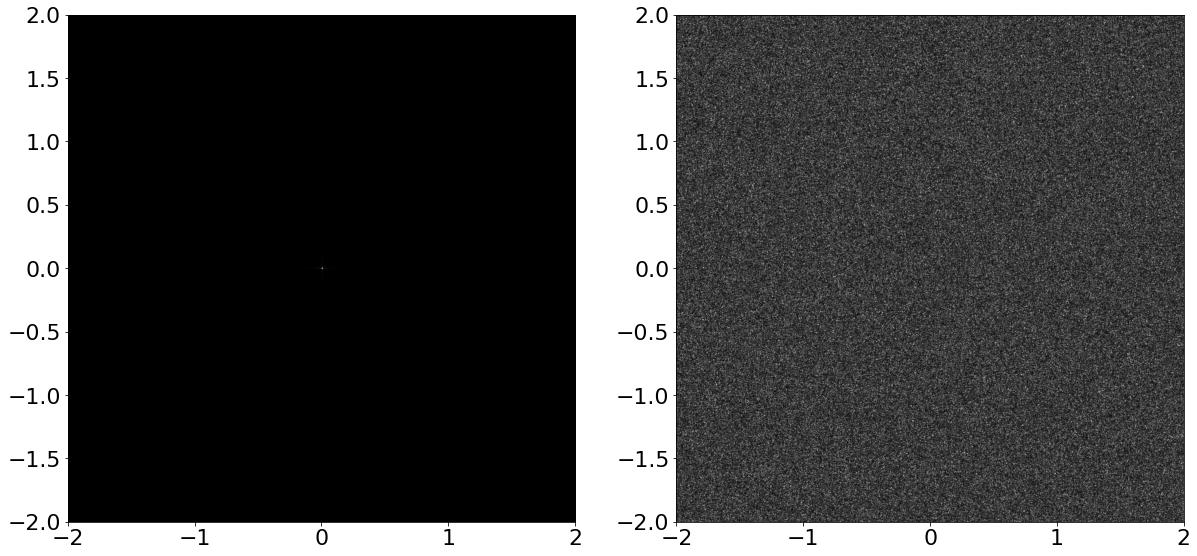

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2)
Z = np.random.randint(0,2,size=(512,512))
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
ax1.imshow(np.abs(zzft), cmap='gray', extent=[-2,2,-2,2], aspect='equal')
zz[256:768,256:768]=np.exp(2*1j*np.pi*np.random.random(size=(512,512)))
zzft=np.fft.fftshift(np.fft.fft2(zz))
ax2.imshow(np.abs(zzft), cmap='gray', extent=[-2,2,-2,2], aspect='equal')
plt.savefig('ftRandomField.pdf')
files.download('ftRandomField.pdf')

## bandpass spectrograph

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

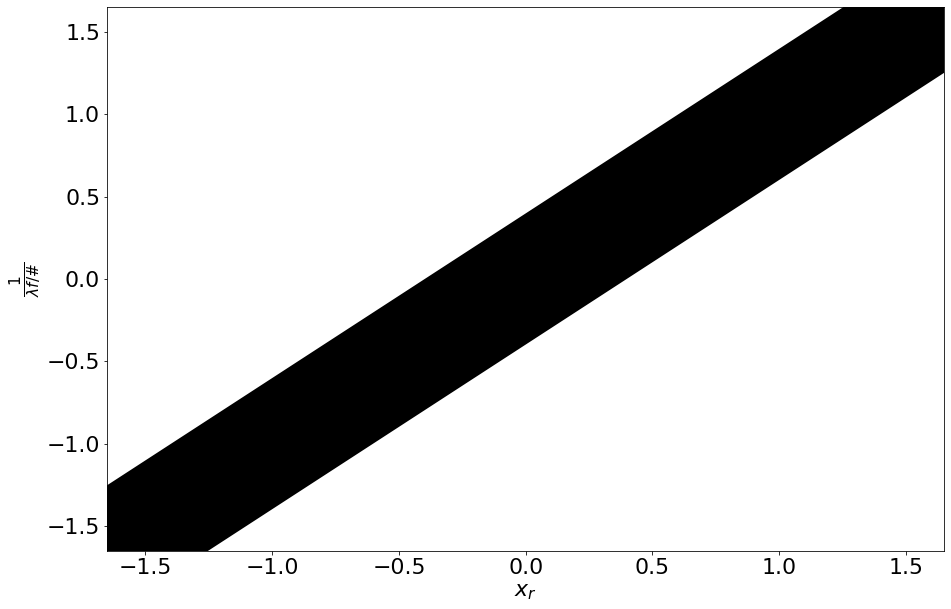

In [19]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.plot([-1.50,1.5],[-1.5,1.5], 'k', linewidth=110)
plt.ylabel(r'$\frac{1}{ \lambda f/\#}$')
plt.xlabel(r'$x_r$')
plt.savefig('coherentBandPass.pdf')
files.download('coherentBandPass.pdf')
plt.show()